In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # 这里添加导入DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 加载数据
#fu = np.load(r"feature/Character-SIFT/fu_Character-SIFT.npy")
#notfu = np.load(r"feature/Character-SIFT/notfu_Character-SIFT.npy")  # 确保这里加载的是notfu数据喵

f = np.load(r"feature/20.npy")
fu = f[:501]
notfu = f[501:3812]
test = f[3812:3822]

# 合并数据
X = np.concatenate((fu, notfu), axis=0)
y = np.concatenate((np.ones(len(fu)), np.zeros(len(notfu))), axis=0)  # 1代表fu，0代表notfu

# 分割数据为训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
len(fu)

501

In [59]:
len(notfu)

3311

In [60]:
# 设置 Adaboost 分类器的参数
learning_rate = 1.0
n_estimators = 500
random_state = 42

# 创建 Adaboost 分类器
clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    random_state=random_state
)

In [61]:
from sklearn.metrics import f1_score

clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(f1_score(y_val, y_pred, average="macro"))
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

0.9880790563237247


array([[635,   3],
       [  2, 123]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report

print('分类报告:') 	#包括准确率、召回率、f1得分等
print(classification_report(y_val, y_pred))

分类报告:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       638
         1.0       0.98      0.98      0.98       125

    accuracy                           0.99       763
   macro avg       0.99      0.99      0.99       763
weighted avg       0.99      0.99      0.99       763



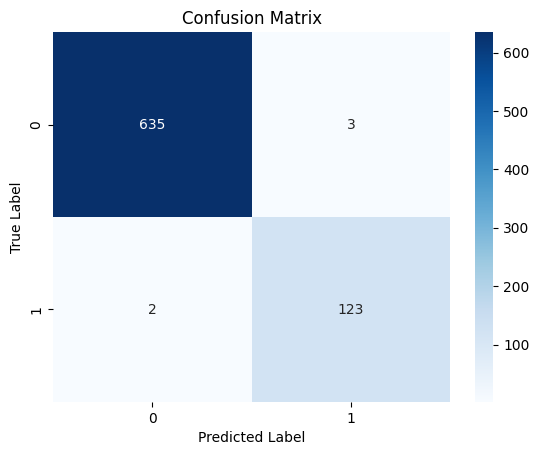

In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_val, y_pred)

# 使用Seaborn绘制混淆矩阵的热图
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
#test=np.load(r"feature/Character-SIFT/testfu_Character-SIFT.npy")

In [65]:
# 预测测试集
y_pred = clf.predict(test)

# 把预测结果转换为整数
y_pred_int = y_pred.astype(int)

# 现在y_pred_int中的值将不再有小数点喵
y_pred_int

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0])